In [67]:
import numpy as np
from PIL import Image, ImageOps
import pandas as pd
from pylab import *
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from scipy.stats import variation
import seaborn as sb
import matplotlib.pyplot as plt 

In [43]:
import glob
import cv2
food=['NORMAL', 'PNEUMONIA']
fooddata={}
foodavg={}
avgpixelfood=[]
for i in food:
    img_paths=glob.glob("/Users/viralmehta/Downloads/CellData/chest_xray/test/"+i+"/*.jpeg")
    img_paths.extend(glob.glob("/Users/viralmehta/Downloads/CellData/chest_xray/train/"+i+"/*.jpeg"))
    mat_y = np.array([[ -1, -2, -1], 
                       [ 0, 0, 0], 
                       [ 1, 2, 1]])
    mat_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
    filter_vals = np.array([[-1, -1, 1, 2], [-1, -1, 1, 0], [-1, -1, 1, 1], [-1, -1, 1, 1]])
    def read_and_prep_images_red(img_paths):
        imgs = [cv2.imread(img_path) for img_path in img_paths]
        imgs = [cv2.resize(img, (100, 100), interpolation = cv2.INTER_AREA) for img in imgs]
        imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imgs]
        imgs = [cv2.filter2D(img, -1, mat_y) for img in imgs]
        imgs = [cv2.filter2D(img, -1, mat_x) for img in imgs]
        img_array = [array(img).flatten() for img in imgs]
        #output = preprocess_input(img_array)
        return(img_array)

    fooddata[i]= read_and_prep_images_red(img_paths)
    tries=shape(fooddata[i])[0]
    convsum=[0]*shape(fooddata[i])[1]
    for j in range(tries):
        convsum= fooddata[i][j]+convsum

    foodavg[i]=convsum/tries
    
    
    
    y_pos = np.arange(1, len(fooddata[i][0])+1)

<AxesSubplot:>

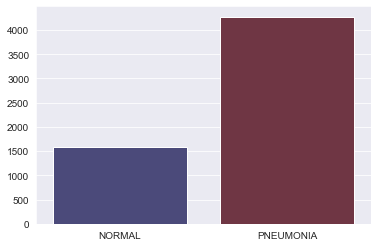

In [77]:
##how many food data for each class:
testsize=[]
for i in food:
    testsize.append(shape(fooddata[i])[0])
    
sb.barplot(x=food, y= testsize, palette= 'icefire')

In [71]:
y_pos

array([    1,     2,     3, ...,  9998,  9999, 10000])

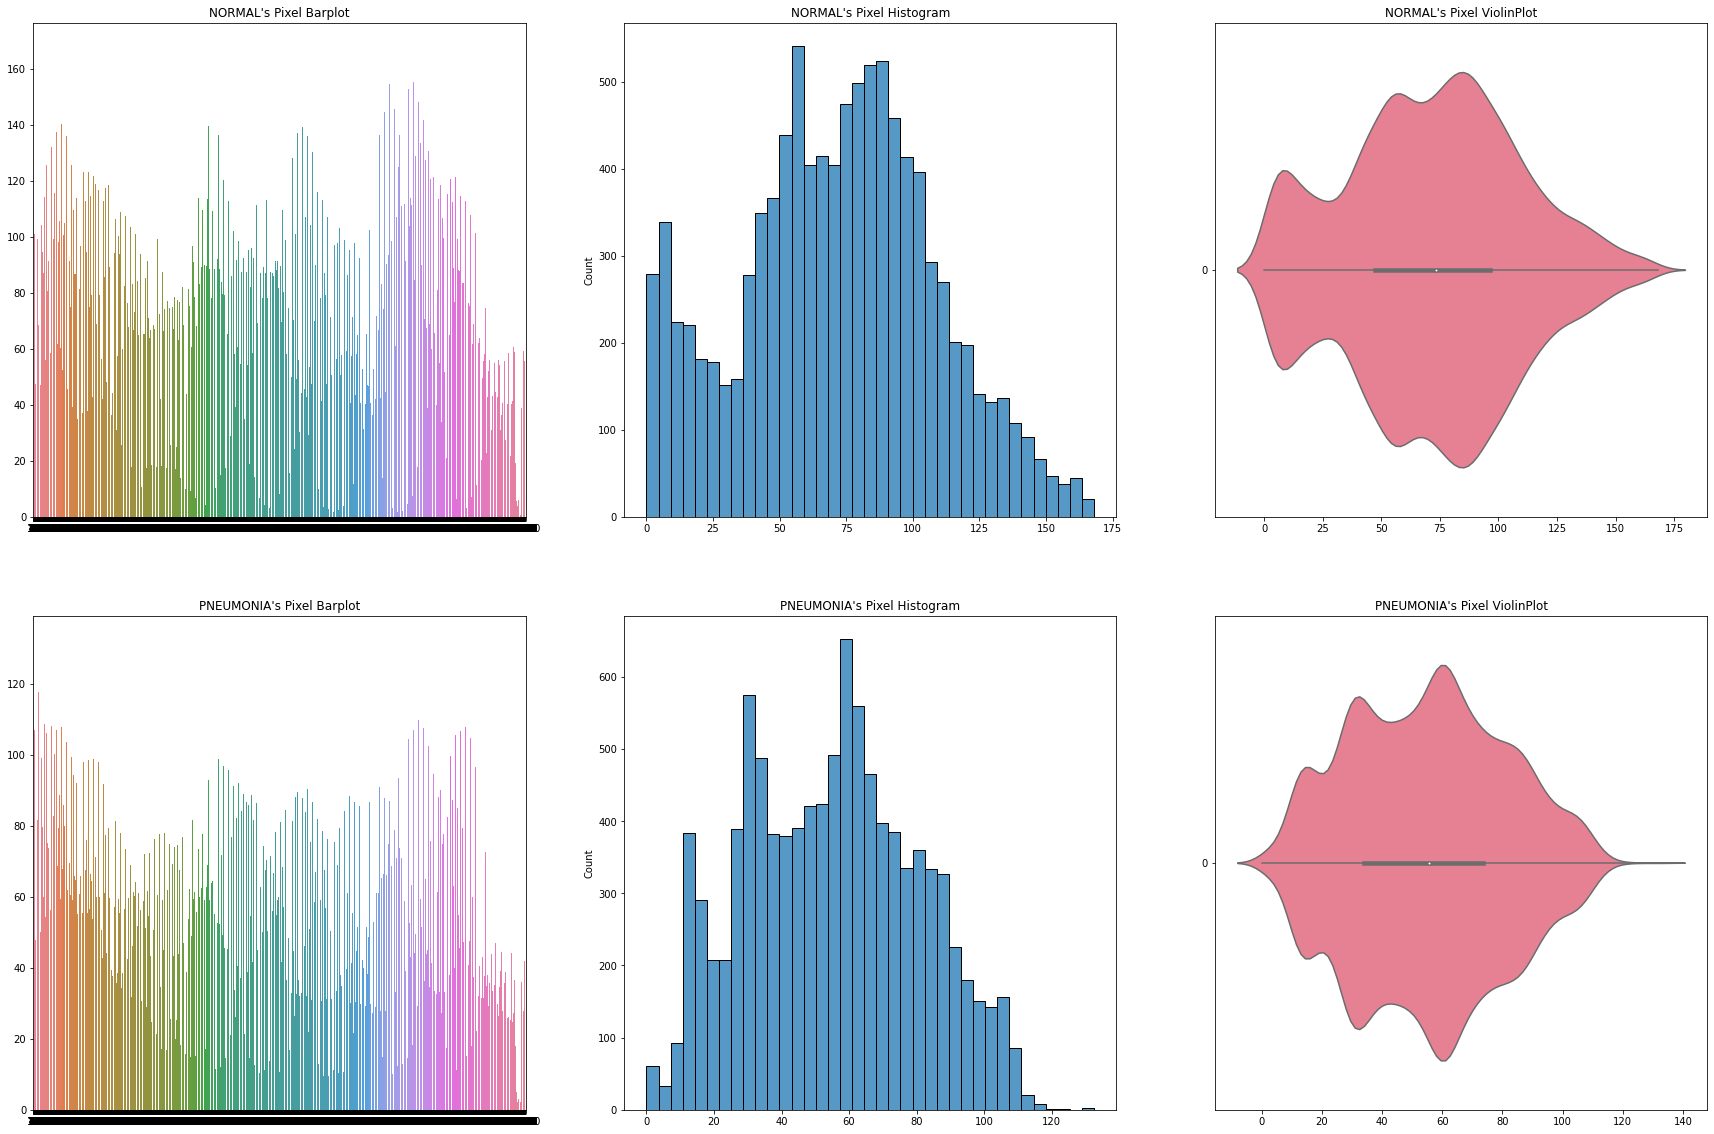

In [81]:
import seaborn as sb
f, axes = plt.subplots(2, 3, figsize=(30, 20))
count = 0
for i in food:
    sb.barplot(x=y_pos, y=foodavg[i], ax = axes[count,0], palette="husl").set(title=f"{i}'s Pixel Barplot")
    sb.histplot(data = foodavg[i], ax = axes[count,1], palette="husl").set(title=f"{i}'s Pixel Histogram")
    sb.violinplot(data = foodavg[i], orient = "h", ax = axes[count,2], palette="husl").set(title=f"{i}'s Pixel ViolinPlot")
    
    count += 1

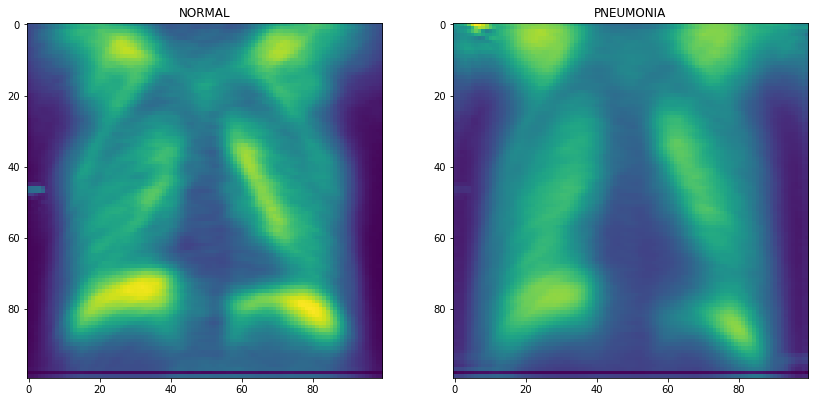

In [46]:
fig = plt.figure(figsize=(14, 20))

count=1
for i in food:
    ax = fig.add_subplot(1, 2, count)
    ax.set_title(i)
    avgarray= foodavg[i].reshape(-1, 100)
    imgplot = plt.imshow(avgarray)

    count+=1

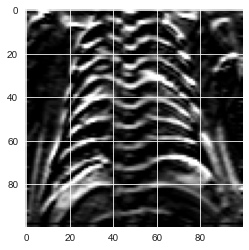

In [61]:
image = cv2.imread('/Users/viralmehta/Downloads/CellData/chest_xray/train/PNEUMONIA/BACTERIA-7631316-0001.jpeg')
image = cv2.resize(image, (100, 100), interpolation = cv2.INTER_AREA)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mat_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
mat_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

filtered_image = cv2.filter2D(gray, -1, mat_y)
filtered_image = cv2.filter2D(filtered_image, -1, mat_x)
plt.imshow(filtered_image, cmap= 'gray')

In [18]:
ttestmatrix= np.zeros((2, 2))
ttestmatrix

array([[0., 0.],
       [0., 0.]])

In [134]:
stats.ttest_ind(avgpixelfood[2], avgpixelfood[3], equal_var=False)[1]

2.6720301311808446e-05

In [21]:
foodavg

{'NORMAL': array([38.63739735, 40.19330385, 42.79785218, ..., 11.68603917,
         9.28300695,  9.28300695]),
 'PNEUMONIA': array([67.26398315, 73.74093143, 78.30400187, ..., 12.98432015,
        15.47343787, 15.47343787])}

In [35]:
from scipy import stats
for i, x in enumerate(food):
    for j, y in enumerate(food):
        if x==y:
            ttestmatrix[i][j]=0
        else:
            result=stats.ttest_ind(foodavg[x], foodavg[y], equal_var=False)
            ttestmatrix[i][j]= round(result[1], 7)


In [36]:
ttestmatrix

array([[0., 0.],
       [0., 0.]])

"Kolmogorov—Smirnov image comparison"
https://math.dartmouth.edu/~m70s20/ImageAnalysis.pdf

https://stats.stackexchange.com/questions/463930/how-can-i-tell-if-images-are-from-the-same-distribution 

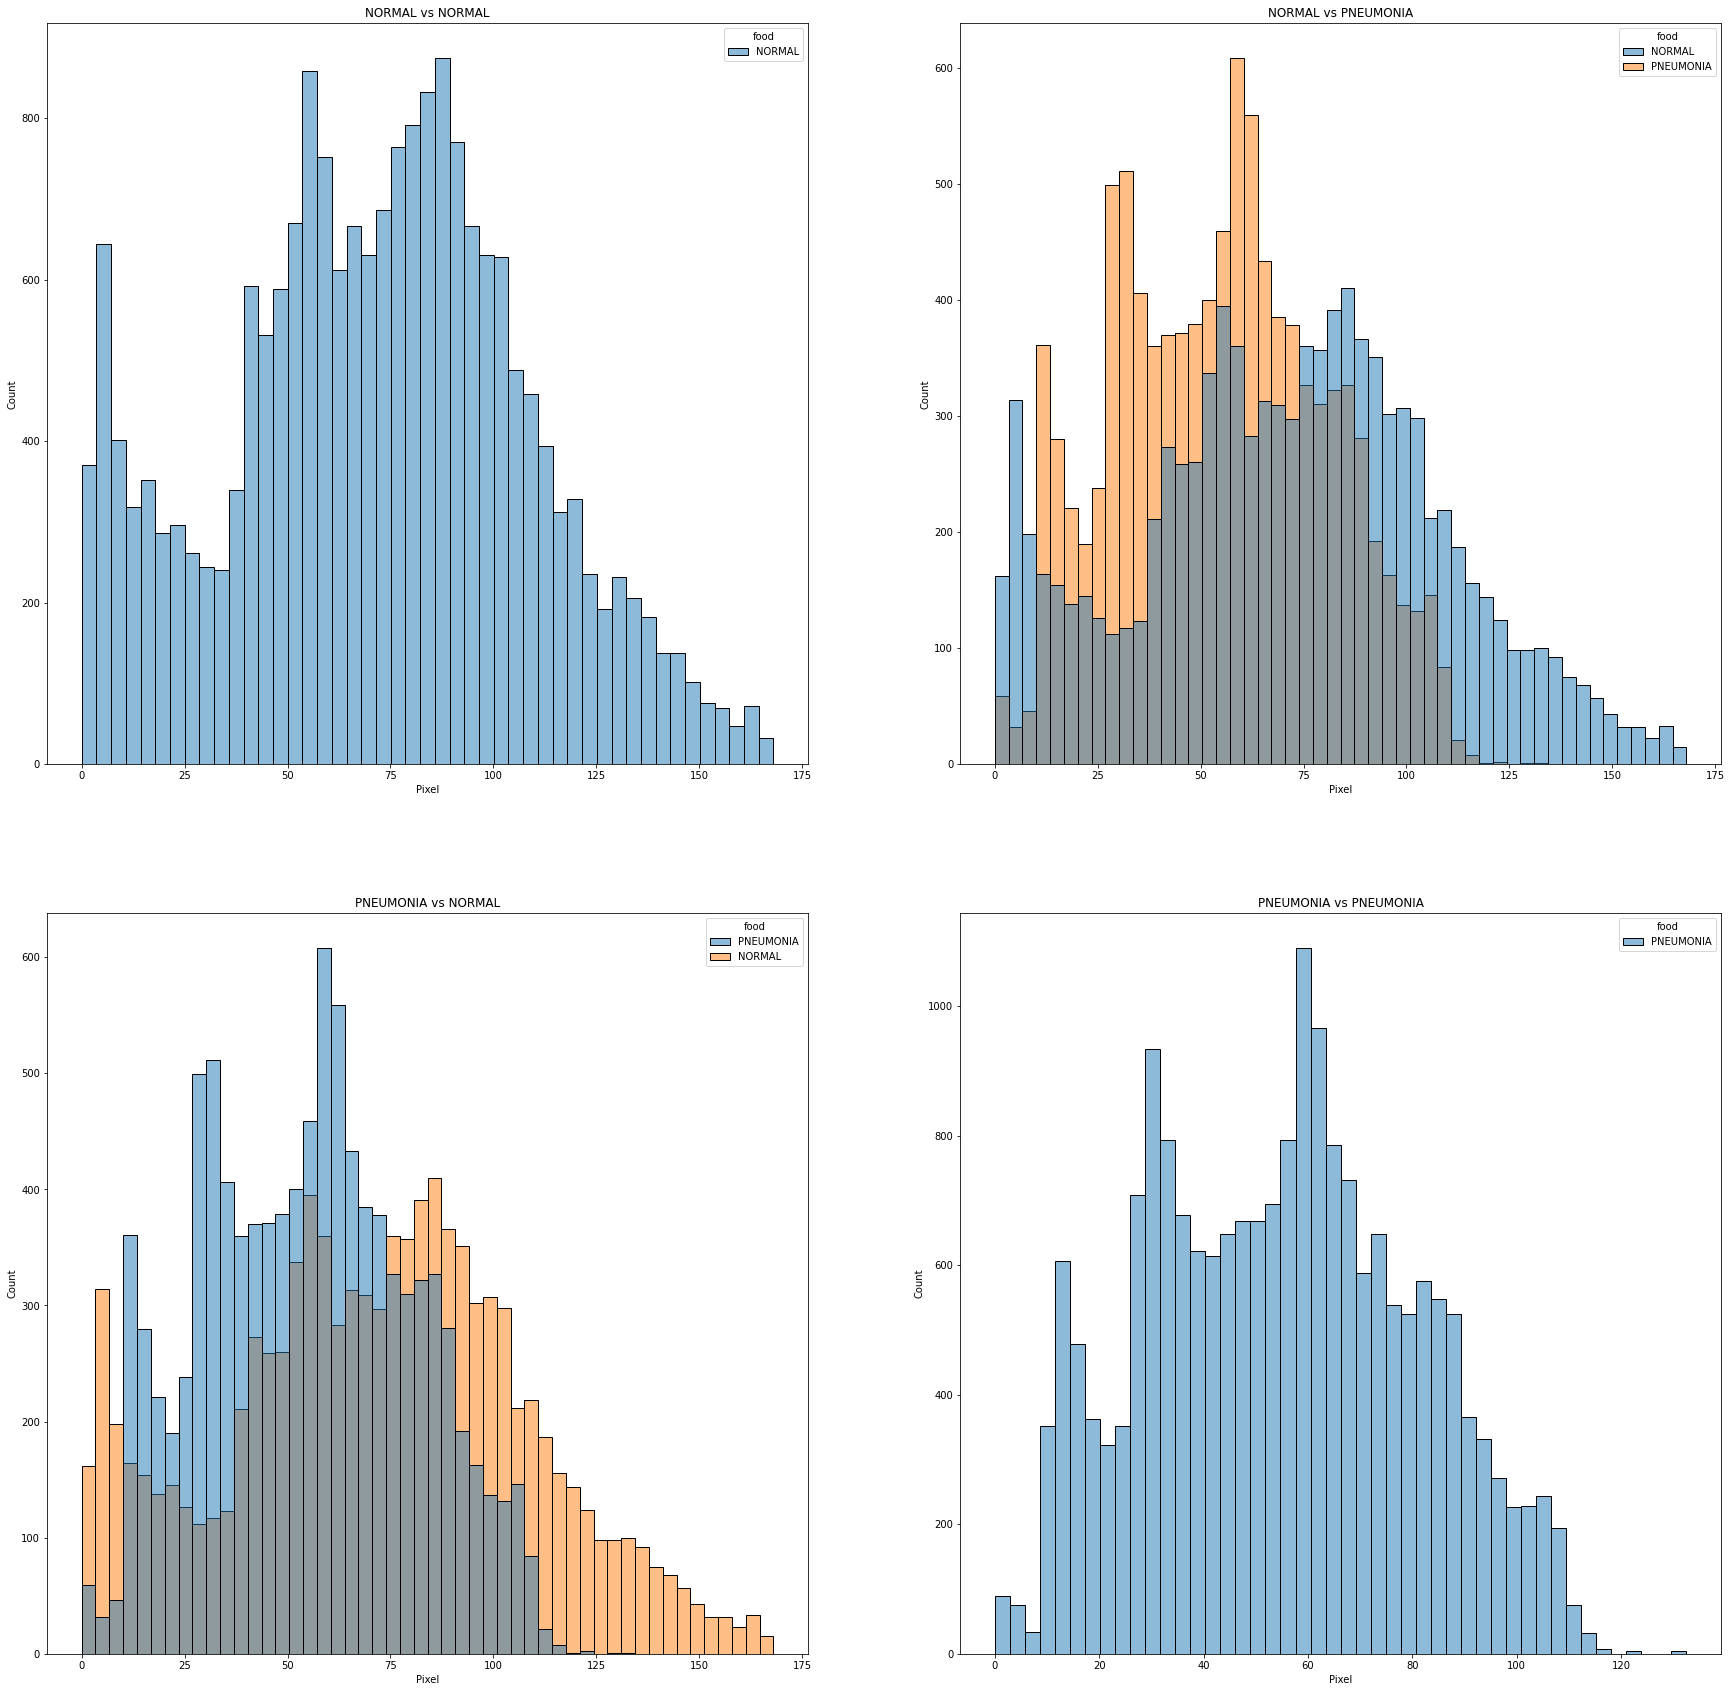

In [47]:
fig = plt.figure(figsize=(30, 30))

count=1
for i in food:
    for j in food:
        df1= pd.DataFrame(foodavg[i], columns=['Pixel'])
        df1['food']= i

        df2= pd.DataFrame(foodavg[j], columns=['Pixel'])
        df2['food']= j
        result = pd.concat([df1, df2], ignore_index=True, sort=False)

        ax = fig.add_subplot(2, 2, count)
        ax.set_title(i + ' vs '+ j)
        sb.histplot(data= result, x="Pixel", hue= 'food')
        count+=1

In [82]:
food

['NORMAL', 'PNEUMONIA']

In [83]:
import scipy
scipy.stats.ks_2samp(foodavg['NORMAL'], foodavg['PNEUMONIA'])

KstestResult(statistic=0.2504, pvalue=1.2368469271974868e-275)

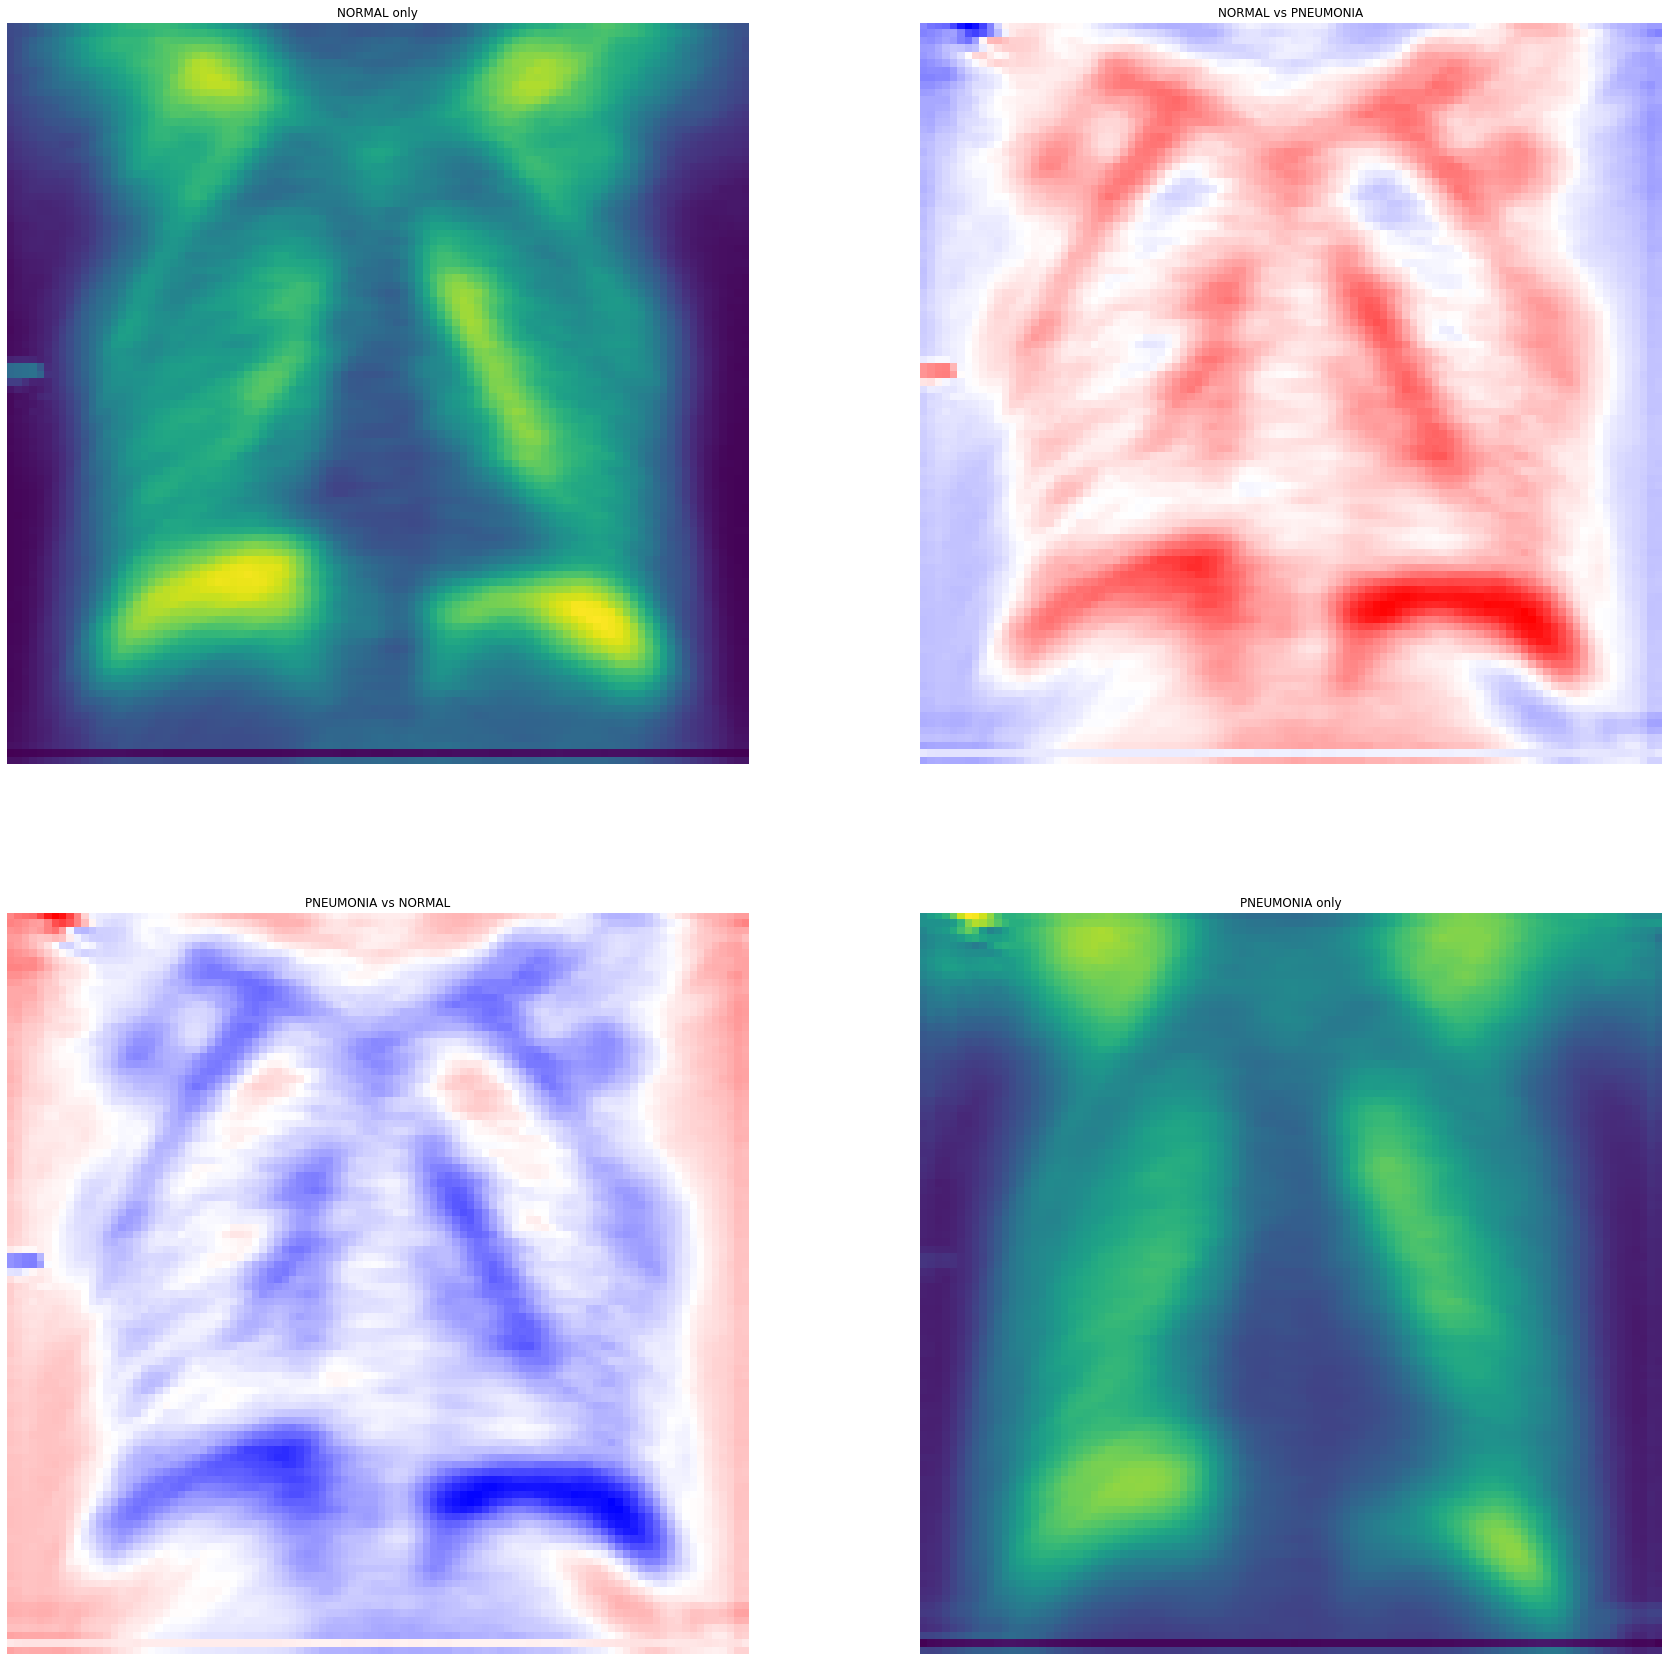

In [48]:
fig = plt.figure(figsize=(30, 30))

count=1
for i in food:
    for j in food:
        if(i==j):
            contrast_mean = foodavg[i]
            contrast_mean=contrast_mean.reshape(-1, 100)
            ax = fig.add_subplot(2, 2, count)
            ax.set_title(i + ' only')
            plt.imshow(contrast_mean)
            plt.axis('off')
            count+=1
        else:  
            contrast_mean = foodavg[i] - foodavg[j]
            contrast_mean=contrast_mean.reshape(-1, 100)
            ax = fig.add_subplot(2, 2, count)
            ax.set_title(i + ' vs '+ j)
            plt.imshow(contrast_mean, cmap='bwr')
            plt.axis('off')
            count+=1

In [85]:
food

['NORMAL', 'PNEUMONIA']

In [63]:
dfnorm= pd.DataFrame()
for i in range(shape(fooddata['NORMAL'])[0]):
    dfnorm[i]= fooddata['NORMAL'][i]
dfnorm= dfnorm.T
dfnorm['label']='NORMAL'

dfpne= pd.DataFrame()
for i in range(shape(fooddata['PNEUMONIA'])[0]):
    dfpne[i]= fooddata['PNEUMONIA'][i]
dfpne= dfpne.T
dfpne['label']='PNEUMONIA'

traindf = pd.DataFrame()
traindf = traindf.append(dfnorm)
traindf = traindf.append(dfpne)

traindf

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnorm[i]= fooddata['NORMAL'][i]
<ipython-input-63-8c847f0e5a48>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfpne[i]= fooddata['PNEUMONIA'][i]
<ipython-input-63-8c847f0e5a48>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

<ipython-input-63-8c847f0e5a48>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  traindf = traindf.append(dfnorm)
<ipython-input-63-8c847f0e5a48>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  traindf = traindf.append(dfpne)


,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,0,0,0,0,0,6,18,30,18,0,...,0,0,0,0,0,2,6,8,8,NORMAL
1,0,0,0,0,0,94,202,140,32,0,...,2,0,0,0,0,0,0,0,0,NORMAL
2,208,255,255,255,255,238,0,0,0,0,...,36,60,52,16,0,0,0,0,0,NORMAL
3,0,0,4,12,8,0,0,6,32,52,...,255,166,0,0,0,0,0,0,0,NORMAL
4,0,0,0,0,0,6,6,0,0,0,...,0,0,0,0,0,0,0,0,0,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PNEUMONIA
4269,0,2,22,36,28,12,0,0,0,0,...,168,158,120,48,8,0,0,0,0,PNEUMONIA
4270,255,255,255,150,244,255,255,255,138,0,...,2,0,2,6,6,2,0,0,0,PNEUMONIA
4271,0,0,0,0,0,166,255,255,255,130,...,18,12,4,0,0,4,4,0,0,PNEUMONIA


In [84]:
testsize

[1583, 4273]